# COMP5310 PROJECT STAGE 2
### Assignment Group 30
### SID1: 540908237 - mift0353, SID2: 540844821 - mrau0998 , SID3: 550206406 - vsup0468

## Group Component 1

### Preliminary Changes to Data
This section imports all required libraries for preprocessing, modeling, evaluation, and visualization.

In [19]:
# Import all dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
import keras_tuner as kt
import xgboost as xgb

#### Data Loading and Preprocessing
This section contains the code for loading and preprocessing the data.

In [20]:
# Import data

data = pd.read_csv("vsup0468_A1_CleanDataset.csv")
data.head()

,Make_Model,Price,Mileage,Fuel,Age,Previous_Owners,Horsepower,Gearing_Type,Displacement,Drive_Chain
0,Audi A1,15770.0,56012.8,Benzine,3.0,1.0,66.0,Automatic,1422.0,front
1,Audi A1,14640.0,83449.8,Diesel,3.0,1.0,85.0,Automatic,1461.0,front
2,Audi A1,16422.0,62110.8,Diesel,3.0,1.0,85.0,Automatic,1598.0,front
3,Audi A1,17990.0,26414.9,Benzine,3.0,1.0,85.0,Automatic,1461.0,front
4,Audi A1,18900.0,9752.0,Diesel,1.0,1.0,85.0,Automatic,1598.0,front


In [23]:
# Separate the features and target variable.

features_df = data.drop("Price", axis=1)
target_df = data["Price"]

In [25]:
# View the first 5 rows of features_df

features_df.head()

,Make_Model,Mileage,Fuel,Age,Previous_Owners,Horsepower,Gearing_Type,Displacement,Drive_Chain
0,Audi A1,56012.8,Benzine,3.0,1.0,66.0,Automatic,1422.0,front
1,Audi A1,83449.8,Diesel,3.0,1.0,85.0,Automatic,1461.0,front
2,Audi A1,62110.8,Diesel,3.0,1.0,85.0,Automatic,1598.0,front
3,Audi A1,26414.9,Benzine,3.0,1.0,85.0,Automatic,1461.0,front
4,Audi A1,9752.0,Diesel,1.0,1.0,85.0,Automatic,1598.0,front


In [27]:
# View the first 5 rows of target_df

target_df.head()

0    15770.0
1    14640.0
2    16422.0
3    17990.0
4    18900.0
Name: Price, dtype: float64

In [29]:
# Data preprocessing

## Define categorical and numerical features
categorical_features = features_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = features_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

## Preprocess categorical columns with one-hot encoding and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

features_df_preprocessed = preprocessor.fit_transform(features_df)

## Convert dataframe to numpy array
X_full = features_df_preprocessed
y_full = target_df.values

### Data Split for train/validation/test sets

In [32]:
# Split full dataset to train, val, and test sets

# First split: train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_full, y_full, test_size=0.2, random_state=5310
)

# Second split: validation (10%) and test (10%) from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=5310
)

In [34]:
# validate the train, val and test sets shape

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of X_val = {X_val.shape}")
print(f"Shape of y_val = {y_val.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (2783, 23)
Shape of y_train = (2783,)
Shape of X_val = (348, 23)
Shape of y_val = (348,)
Shape of X_test = (348, 23)
Shape of y_test = (348,)


## End of Group Component 1

## Individual Component
This section contains the code for creating, optimizing, and evaluating the models.

### 1. Multilayer Perceptron (MLP) - Unikey: mift0353

Pseudocode:

#### Base setup for MLP model

In [17]:
# Define MLP Model
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile MLP model
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train MLP model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = mlp_model.fit(X_train, y_train, 
                        validation_data=(X_val, y_val), 
                        epochs=50, 
                        batch_size=32, 
                        callbacks=[early_stop])

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 433694112.0000 - mae: 17027.8730 - val_loss: 331567072.0000 - val_mae: 16965.2480
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 349296768.0000 - mae: 16790.3008 - val_loss: 322601184.0000 - val_mae: 16713.7090
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 313872544.0000 - mae: 16046.5098 - val_loss: 293405344.0000 - val_mae: 15875.9053
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 279482560.0000 - mae: 15014.9258 - val_loss: 239371696.0000 - val_mae: 14202.2383
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 223914720.0000 - mae: 13297.0010 - val_loss: 167467488.0000 - val_mae: 11620.4609
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 250235184.0000 - mae: 10838.2090 - val_loss: 97406464.0000 - val_mae: 8402.3008
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 171708480.0000 - mae: 7492.3188 - val_loss: 48868924.0000 - val_mae: 5354.8599
Epoch 8/50


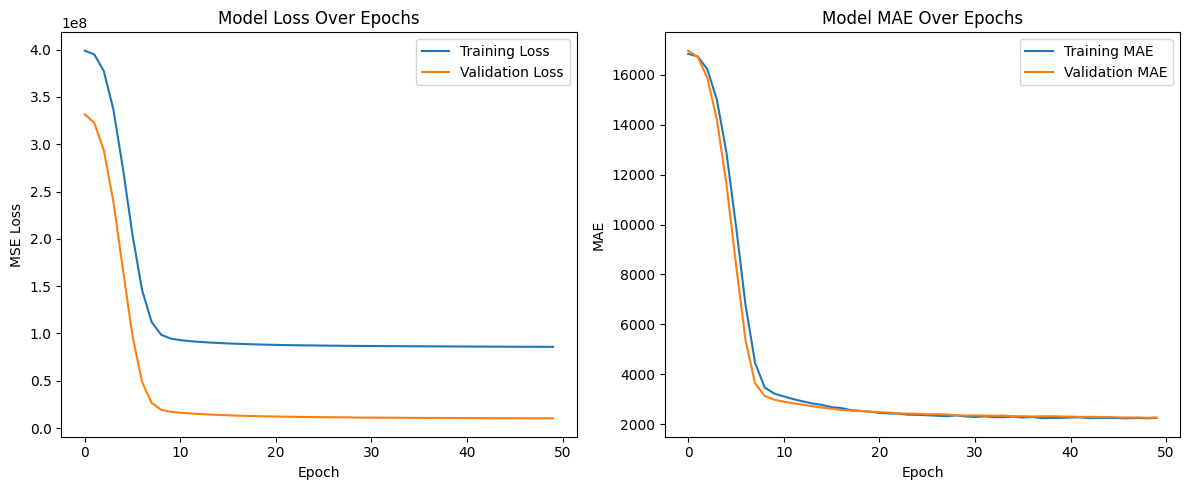

In [18]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


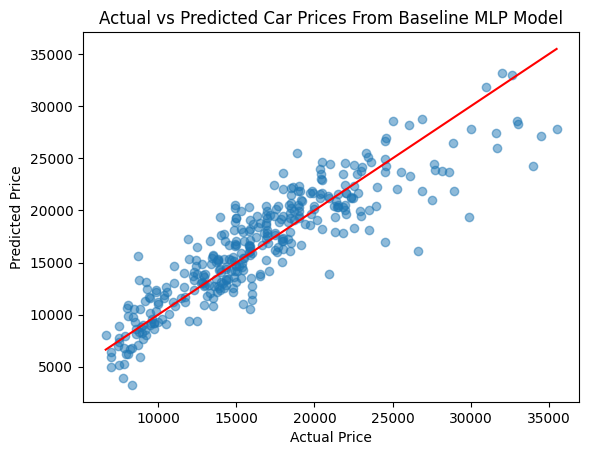

In [19]:
# Plot predictions vs actual

y_pred = mlp_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From Baseline MLP Model")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()

In [20]:
# Evaluate the Model

# Compute MSE and MAE
loss, mae = mlp_model.evaluate(X_test, y_test)
print(f"Baseline MSE: {loss:.4f}")
print(f"Baseline MAE: {mae:.4f}")

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f"Baseline R-squared: {r2:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 6136389.5000 - mae: 1841.1013
Baseline MSE: 6855558.5000
Baseline MAE: 1972.2455
Baseline R-squared: 0.7949


#### Hyperparameter tuning for MLP model

In [22]:
# Define function to do hyperparameter tuning

def build_mlp_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
    
    # Tune number of layers and units
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
    
    model.add(tf.keras.layers.Dense(1))  # output layer for regression
    
    # Compile with tuned learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )
    
    return model

In [23]:
# Initialize the tuner

tuner = kt.RandomSearch(
    build_mlp_model,
    objective='val_mae',
    max_trials=50,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='car_price_mlp'
)

In [24]:
# Search for the Best Hyperparameters

tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stop])

Trial 50 Complete [00h 00m 02s]
val_mae: 1926.8116455078125

Best val_mae So Far: 1926.8116455078125
Total elapsed time: 00h 02m 51s


In [86]:
# Show best 5 hyperparameter tuning results
mlp_trials = []
for trial in tuner.oracle.get_best_trials(num_trials=50):
    mlp_trials.append({
        'trial_id': trial.trial_id,
        'hyperparameters': trial.hyperparameters.values,
        'val_mae': trial.metrics.get_last_value('val_mae')
    })

mlp_results_df = pd.DataFrame(mlp_trials)
pd.set_option('display.max_colwidth', None)
mlp_results_df.head()

,trial_id,hyperparameters,val_mae
0,49,"{'num_layers': 4, 'units_0': 128, 'activation': 'relu', 'learning_rate': 0.0033749563384050086, 'units_1': 128, 'units_2': 192, 'units_3': 64, 'units_4': 128}",1926.811646
1,42,"{'num_layers': 3, 'units_0': 32, 'activation': 'relu', 'learning_rate': 0.009925419577869306, 'units_1': 96, 'units_2': 32, 'units_3': 256, 'units_4': 224}",1947.509399
2,29,"{'num_layers': 5, 'units_0': 160, 'activation': 'relu', 'learning_rate': 0.0007425639515658108, 'units_1': 32, 'units_2': 64, 'units_3': 160, 'units_4': 96}",1948.972656
3,16,"{'num_layers': 3, 'units_0': 160, 'activation': 'relu', 'learning_rate': 0.001430113474396025, 'units_1': 256, 'units_2': 192, 'units_3': 192, 'units_4': 32}",1950.359009
4,40,"{'num_layers': 5, 'units_0': 192, 'activation': 'relu', 'learning_rate': 0.008263646698419431, 'units_1': 224, 'units_2': 224, 'units_3': 128, 'units_4': 32}",1953.315918


In [26]:
# Retrieve the Best Model

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for param in best_hps.values:
    print(f" - {param}: {best_hps.get(param)}")

Best hyperparameters:
 - num_layers: 4
 - units_0: 128
 - activation: relu
 - learning_rate: 0.0033749563384050086
 - units_1: 128
 - units_2: 192
 - units_3: 64
 - units_4: 128


In [76]:
# Build and train final model

best_mlp_model = tuner.hypermodel.build(best_hps)
best_mlp_history = best_mlp_model.fit(X_train, y_train, 
                              validation_data=(X_val, y_val), 
                              epochs=50, 
                              batch_size=32, 
                              callbacks=[early_stop])

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 280514080.0000 - mae: 13090.9053 - val_loss: 11775267.0000 - val_mae: 2421.4233
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 57280016.0000 - mae: 2308.6895 - val_loss: 9893378.0000 - val_mae: 2102.3765
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 82482568.0000 - mae: 2216.5759 - val_loss: 10108963.0000 - val_mae: 2278.2427
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 90991720.0000 - mae: 2305.8965 - val_loss: 10846179.0000 - val_mae: 2224.3210
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 61053924.0000 - mae: 2235.8364 - val_loss: 9596960.0000 - val_mae: 2138.0183
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 40374212.0000 - mae: 1924.3043 - val_loss: 11056570.0000 - val_mae: 2406.1877
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 162373616.0000 - mae: 2961.2461 - val_loss: 12805376.0000 - val_mae: 2489.0039
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━

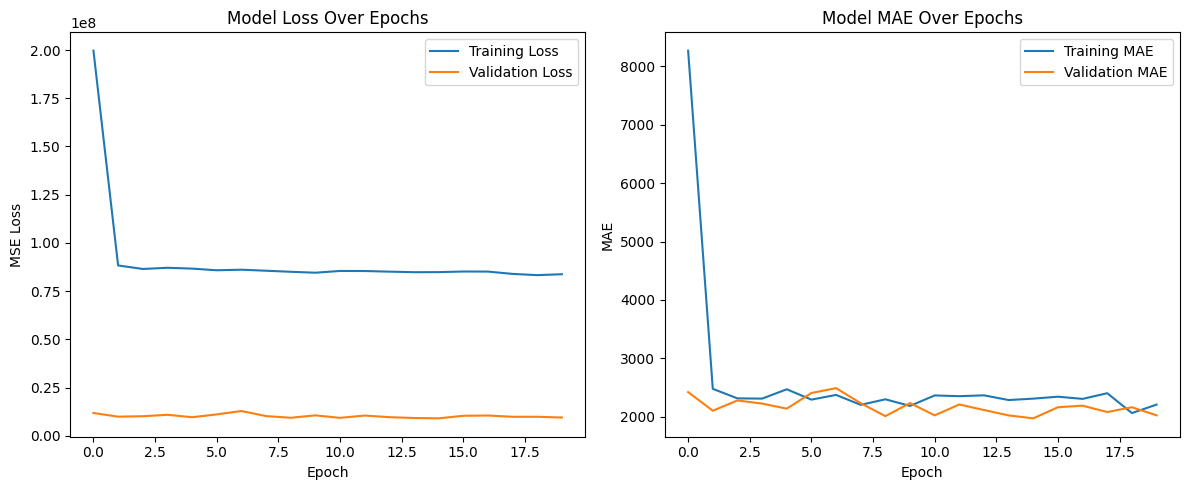

In [78]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(best_mlp_history.history['loss'], label='Training Loss')
plt.plot(best_mlp_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(best_mlp_history.history['mae'], label='Training MAE')
plt.plot(best_mlp_history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


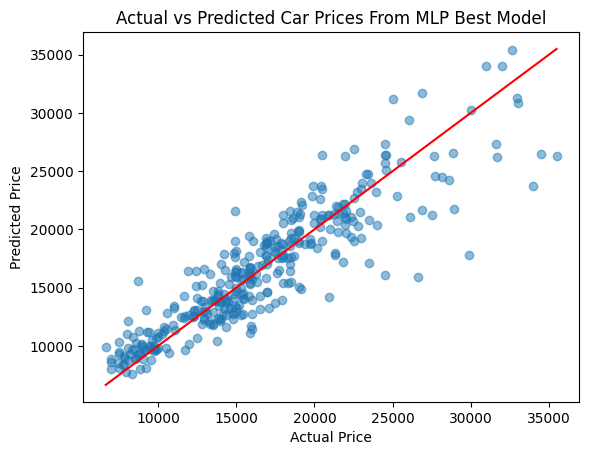

In [80]:
# Plot predictions vs actual

final_y_pred = best_mlp_model.predict(X_test)
plt.scatter(y_test, final_y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From MLP Best Model")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()

In [82]:
# Evaluate the Best Model

# Compute MSE and MAE
loss, mae = best_mlp_model.evaluate(X_test, y_test)
print(f"BEST MSE: {loss:.4f}")
print(f"BEST MAE: {mae:.4f}")

# Calculate R²
r2 = r2_score(y_test, final_y_pred)
print(f"Baseline R-squared: {r2:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5525474.5000 - mae: 1678.8307
BEST MSE: 6331431.0000
BEST MAE: 1787.2988
Baseline R-squared: 0.8106


In [84]:
# Use Trained Best MLP Model to Predict on New Data

new_data = pd.DataFrame([{
    'Make_Model': 'Audi A1',
    'Mileage': 54000.0,
    'Fuel': 'Benzine',
    'Age': 3.0,
    'Previous_Owners': 1.0,
    'Horsepower': 85.0,
    'Gearing_Type': 'Automatic',
    'Displacement': 1600.0,
    'Drive_Chain': 'front'
}])

# Preprocess the New Data Using the Same Fitted Preprocessor
new_data_processed = preprocessor.transform(new_data)

predicted_price = best_mlp_model.predict(new_data_processed)
print(f"Predicted price: ${predicted_price[0][0]:,.2f} ± approx. ${mae:,.0f} (based on test MAE)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted price: $16,504.47 ± approx. $1,787 (based on test MAE)


### 2. CatBoost (Categorical Boosting) - Unikey: mrau0998

Pseudocode:

#### Base Setup for CatBoost Model

In [35]:
# Split raw data for CatBoost
X_cb_train, X_cb_temp, y_cb_train, y_cb_temp = train_test_split(
    features_df, target_df, test_size=0.2, random_state=5310
)

X_cb_val, X_cb_test, y_cb_val, y_cb_test = train_test_split(
    X_cb_temp, y_cb_temp, test_size=0.5, random_state=5310
)

In [36]:
# Define categorical feature names (these are raw, unencoded)
categorical_features = ['Make_Model', 'Fuel', 'Gearing_Type', 'Drive_Chain']

# Initialize CatBoost regressor
catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    cat_features=categorical_features,
    loss_function='RMSE',
    early_stopping_rounds=50,
    verbose=100,
    random_seed=5310
)

# Train the model using raw data and native categorical support
catboost_model.fit(
    X_cb_train, y_cb_train,
    eval_set=(X_cb_val, y_cb_val),
    use_best_model=True
)

0:	learn: 10602.8688131	test: 6456.1137236	best: 6456.1137236 (0)	total: 57.9ms	remaining: 57.8s
100:	learn: 8061.6494633	test: 3494.5797666	best: 3494.3732925 (99)	total: 143ms	remaining: 1.27s
200:	learn: 7530.6426853	test: 3413.6532713	best: 3413.6117960 (198)	total: 230ms	remaining: 913ms
300:	learn: 6467.7670757	test: 3380.9605260	best: 3370.6510099 (271)	total: 320ms	remaining: 743ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 3370.65101
bestIteration = 271

Shrink model to first 272 iterations.


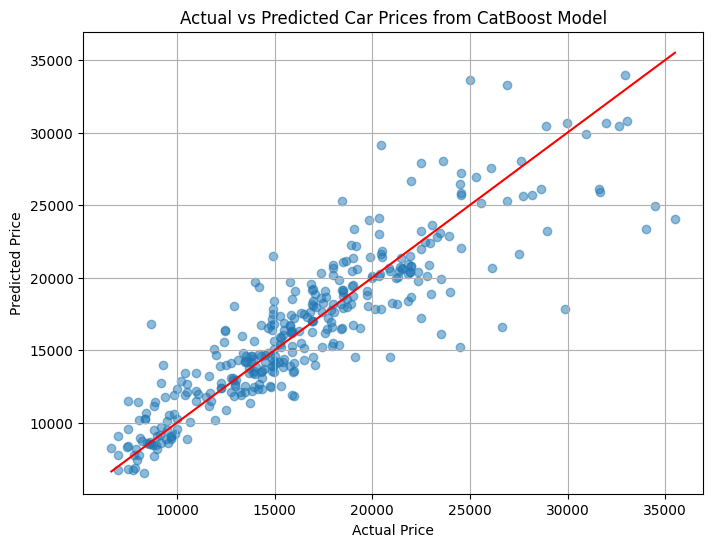

In [37]:
# Predict using CatBoost model
y_cb_pred = catboost_model.predict(X_cb_test)

# Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_cb_test, y_cb_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices from CatBoost Model")
plt.plot([min(y_cb_test), max(y_cb_test)], [min(y_cb_test), max(y_cb_test)], color='red')  # perfect prediction line
plt.grid(True)
plt.show()

In [38]:
# Predict on test set
y_cb_pred = catboost_model.predict(X_cb_test)

# Compute evaluation metrics
mse = mean_squared_error(y_cb_test, y_cb_pred)
mae = mean_absolute_error(y_cb_test, y_cb_pred)
r2 = r2_score(y_cb_test, y_cb_pred)

# Display results
print(f"CatBoost MSE: {mse:.4f}")
print(f"CatBoost MAE: {mae:.4f}")
print(f"CatBoost R²: {r2:.4f}")

CatBoost MSE: 6974258.8396
CatBoost MAE: 1808.0972
CatBoost R²: 0.7913


#### Hyperparameter tuning for CatBoost model

In [40]:
# Initiate the CatBoost model
cb_model = CatBoostRegressor(
    verbose=200, 
    cat_features=categorical_features,
    loss_function='RMSE',
    early_stopping_rounds=50,
    random_seed=5310
)

# Declare the parameters to be tested
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1],
    'iterations': [500,1000]
}

# Perform grid search
grid_search = GridSearchCV(cb_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_cb_train, y_cb_train)

print("Best params:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
0:	learn: 10703.1689579	total: 3.68ms	remaining: 3.67s
200:	learn: 8543.2479428	total: 316ms	remaining: 1.25s
400:	learn: 7988.3353699	total: 612ms	remaining: 915ms
600:	learn: 7739.7286674	total: 864ms	remaining: 573ms
800:	learn: 7399.4788905	total: 1.12s	remaining: 279ms
999:	learn: 7058.5969206	total: 1.41s	remaining: 0us
Best params: {'depth': 8, 'iterations': 1000, 'learning_rate': 0.01}
Best score: 74700636.72512157


In [41]:
# Get the best performing model
cb_model_best = grid_search.best_estimator_

# Train the model on the full training data
cb_model_best.fit(X_cb_train, y_cb_train, eval_set=(X_cb_val, y_cb_val), verbose=200)

0:	learn: 10703.1689579	test: 6586.1724818	best: 6586.1724818 (0)	total: 2.19ms	remaining: 2.18s
200:	learn: 8543.2479428	test: 3768.7056641	best: 3768.7056641 (200)	total: 298ms	remaining: 1.18s
400:	learn: 7988.3353699	test: 3487.6193597	best: 3487.6193597 (400)	total: 577ms	remaining: 862ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 3408.275894
bestIteration = 544

Shrink model to first 545 iterations.


# Make predictions on the test set
y_cb_pred = cb_model_best.predict(X_cb_test)

# Plot predictions vs actual values
plt.scatter(y_cb_test, y_cb_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices From CatBoost Best Model")

# Plot a perfect line (diagonal line) representing ideal predictions
plt.plot([min(y_cb_test), max(y_cb_test)], [min(y_cb_test), max(y_cb_test)], color='red')  # perfect line
plt.show()

In [43]:
mse = mean_squared_error(y_cb_test, y_cb_pred)
mae = mean_absolute_error(y_cb_test, y_cb_pred)
r2 = r2_score(y_cb_test, y_cb_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R^2: {r2:.4f}")

Test MSE: 6809784.8884
Test MAE: 1796.7196
Test R^2: 0.7963


In [44]:
# New data (same structure as the original dataset)
new_data = pd.DataFrame([{
    'Make_Model': 'Audi A1',
    'Mileage': 54000.0,
    'Fuel': 'Benzine',
    'Age': 3.0,
    'Previous_Owners': 1.0,
    'Horsepower': 85.0,
    'Gearing_Type': 'Automatic',
    'Displacement': 1600.0,
    'Drive_Chain': 'front'
}])

# Make prediction using the best trained CatBoost model
predicted_price = cb_model_best.predict(new_data)

# Compute MAE from previous evaluation to provide the uncertainty
# You can also use the test MAE directly
print(f"Predicted price for new data: ${predicted_price[0]:,.2f} ± approx. ${mae:,.0f} (based on test MAE)")

Predicted price for new data: $17,544.97 ± approx. $1,797 (based on test MAE)


### 3. XGBoost (eXtreme Gradient Boosting) - Unikey: vsup0468

Pseudocode:

#### Data Pre-processing

In [37]:
# Separate features and target
X_xgb = pd.get_dummies(data.drop('Price', axis=1))
y_xgb = data['Price']

# Split data into train, validation, and test sets
X_xgb_train, X_xgb_temp, y_xgb_train, y_xgb_temp = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=5310)
X_xgb_val, X_xgb_test, y_xgb_val, y_xgb_test = train_test_split(X_xgb_temp, y_xgb_temp, test_size=0.5, random_state=5310)

#### Initial Model Development and Evaluation

In [66]:
# Initialize CatBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    early_stopping_rounds=50,
    eval_metric='rmse',
    random_state=5310
)

# Fit the model using train and validation set for early stopping
xgb_model.fit(X_xgb_train, y_xgb_train, eval_set=[(X_xgb_val, y_xgb_val)], verbose=100)

# Print simple summary 
print("Model training completed successfully.")
print("Model parameters:")
print(xgb_model.get_params())

[0]	validation_0-rmse:6396.85750
[100]	validation_0-rmse:3057.75136
[167]	validation_0-rmse:3120.30742
Model training completed successfully.
Model parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': 50, 'enable_categorical': False, 'eval_metric': 'rmse', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 1000, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 5310, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subs

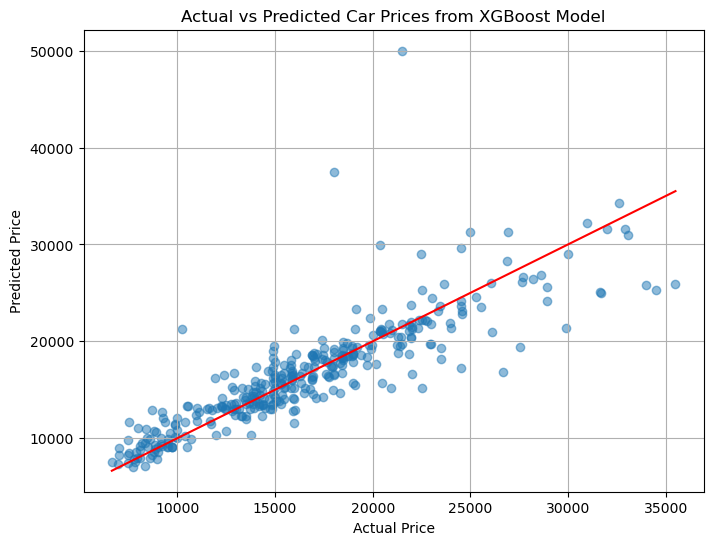

In [41]:
# Make predictions on the test set
y_xgb_pred = xgb_model.predict(X_xgb_test)

# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_xgb_test, y_xgb_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices from XGBoost Model")
plt.plot([y_xgb_test.min(), y_xgb_test.max()], [y_xgb_test.min(), y_xgb_test.max()], color='red')  # Perfect prediction line
plt.grid(True)
plt.show()

In [84]:
# Calculate evaluation metrics
mse = mean_squared_error(y_xgb_test, y_xgb_pred)
mae = mean_absolute_error(y_xgb_test, y_xgb_pred)
r2 = r2_score(y_xgb_test, y_xgb_pred)

# Display metrics
print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost R2: {r2:.4f}")

XGBoost MSE: 9215648.1954
XGBoost MAE: 1741.2384
XGBoost R2: 0.7243


#### Model Optimisation

In [90]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8]
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=5310),  # no early_stopping_rounds
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=3,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_xgb_train, y_xgb_train)

# Display best parameters and score
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Best score: -63698994.95860391


In [92]:
# Get the best model from GridSearchCV
xgb_model_best = grid_search.best_estimator_

# Fit the best model on the full training data
xgb_model_best.fit(X_xgb_train, y_xgb_train, eval_set=[(X_xgb_val, y_xgb_val)], verbose=200)

# Make predictions with the best model
y_xgb_pred_best = xgb_model_best.predict(X_xgb_test)

[0]	validation_0-rmse:6582.77749
[200]	validation_0-rmse:3485.76584
[400]	validation_0-rmse:3030.13150
[499]	validation_0-rmse:2959.05653


#### Model Results

###### The tuned model is evaluated on the test set, showing prediction performance through plots and evaluation metrics.

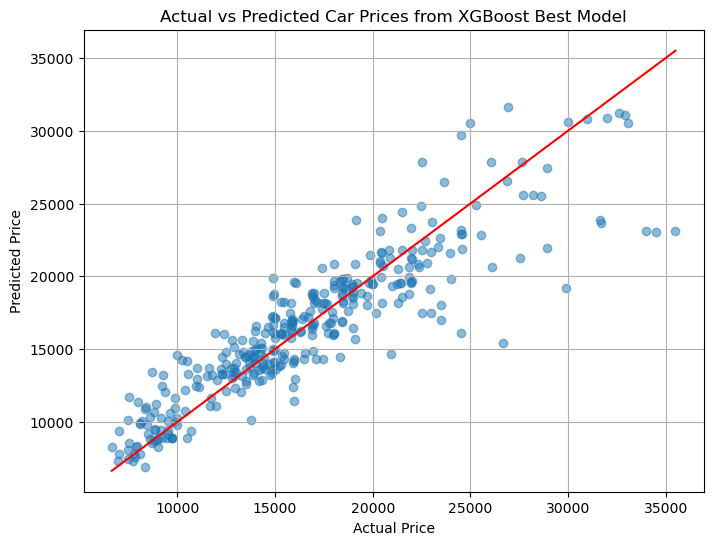

In [94]:
# Plot Actual vs Predicted using best model
plt.figure(figsize=(8,6))
plt.scatter(y_xgb_test, y_xgb_pred_best, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices from XGBoost Best Model")
plt.plot([y_xgb_test.min(), y_xgb_test.max()], [y_xgb_test.min(), y_xgb_test.max()], color='red')
plt.grid(True)
plt.show()


In [96]:
# Evaluate best model performance
mse_best = mean_squared_error(y_xgb_test, y_xgb_pred_best)
mae_best = mean_absolute_error(y_xgb_test, y_xgb_pred_best)
r2_best = r2_score(y_xgb_test, y_xgb_pred_best)

# Display final evaluation results
print(f"Test MSE: {mse_best:.4f}")
print(f"Test MAE: {mae_best:.4f}")
print(f"Test R2: {r2_best:.4f}")


Test MSE: 6411309.9259
Test MAE: 1732.0168
Test R2: 0.8082


In [100]:
# Prepare a new data sample (use the same structure as training data)
new_data = pd.DataFrame([{
    'Make_Model': 'Audi A1',
    'Mileage': 54000.0,
    'Fuel': 'Benzine',
    'Age': 3.0,
    'Previous_Owners': 1.0,
    'Horsepower': 85.0,
    'Gearing_Type': 'Automatic',
    'Displacement': 1600.0,
    'Drive_Chain': 'front'
}])

# Ensure new data matches the model's expected columns
new_data = pd.get_dummies(new_data).reindex(columns=X_xgb.columns, fill_value=0)

# Predict price for new data
predicted_price = xgb_model_best.predict(new_data)

# Display prediction with uncertainty based on test MAE
print(f"Predicted price for new data: ${predicted_price[0]:,.2f} ± approx. ${mae_best:,.0f} (based on test MAE)")


Predicted price for new data: $17,233.87 ± approx. $1,732 (based on test MAE)


## End of Individual Component

## Group Component 2

### Optimal Model Comparison

In [83]:
# Summarize the test performance of all optimized models

comparison_model = {
    'Model': ['MLP', 'CatBoost', 'XGBoost'],
    'Best Hyperparameters': [
        "{'units_1': 256, 'activation_1': 'tanh', 'dropout_1': 0.2, 'units_2': 128, 'activation_2': 'relu'}",
        "{'depth': 6, 'learning_rate': 0.05, 'iterations': 1000}",
        "{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 1000}"
    ],
    'Test MSE': [6331431.00, 6809784.89, 6411309.93],
    'Test MAE': [1787.30, 1796.72, 1732.02],
    'Test R²': [0.810, 0.796, 0.808]
}

df_comparison = pd.DataFrame(comparison_model)

df_comparison['Test MSE'] = df_comparison['Test MSE'].apply(lambda x: f"{x:,.2f}")
df_comparison['Test MAE'] = df_comparison['Test MAE'].apply(lambda x: f"{x:,.2f}")
df_comparison['Test R²'] = df_comparison['Test R²'].apply(lambda x: f"{x:.3f}")

# Display DataFrame as clean table
display(df_comparison.style.hide(axis='index'))

Model,Best Hyperparameters,Test MSE,Test MAE,Test R²
MLP,"{'units_1': 256, 'activation_1': 'tanh', 'dropout_1': 0.2, 'units_2': 128, 'activation_2': 'relu'}","6,331,431.00","1,787.30",0.810
CatBoost,"{'depth': 6, 'learning_rate': 0.05, 'iterations': 1000}","6,809,784.89","1,796.72",0.796
XGBoost,"{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 1000}","6,411,309.93","1,732.02",0.808


### Final Model Recommendation

###### Based on the comparison, MLP is recommended as the final model. It achieved the best overall R² score (0.810), showing the strongest ability to explain variance in the car price predictions, while maintaining a competitive MAE and the lowest MSE. Although XGBoost provided slightly better MAE, MLP’s higher R² and lower MSE suggest better generalization on unseen data. Thus, the MLP model is the most appropriate choice for predicting car prices in this task.

## End of Group Component 2